# Step 1: Load the Titanic Dataset

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Step 2: Explore the Structure

In [9]:
# Basic structure info
print(df.info())

# Statistical summary
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

# 1. Load the Titanic Dataset

In [10]:
# Load the dataset (assuming CSV format)
df = pd.read_csv('Titanic-Dataset.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Check for Null Values

In [12]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 3. Handle Null Values

In [15]:
# Age: Fill with median
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
# Cabin: Drop (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
# Embarked: Fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# 4. Convert Categorical Data to Numeric

In [20]:
# Sex: Male/Female to 1/0
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [21]:
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [22]:
# Embarked: One-hot encoding (C, Q, S)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [25]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [26]:
print(df.head())        

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

# 1. Import Library

In [27]:
import matplotlib.pyplot as plt

# 2. Compute the Correlation Matrix

In [28]:
corr_matrix = df.corr(numeric_only=True)

In [29]:
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.074115,-0.119224
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.162184
Embarked_Q,-0.033606,0.003650,0.221009,0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
Embarked_S,0.022204,-0.149683,0.074053,-0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.499421,1.000000


# 3. Visualize Correlation Matrix with a Heatmap

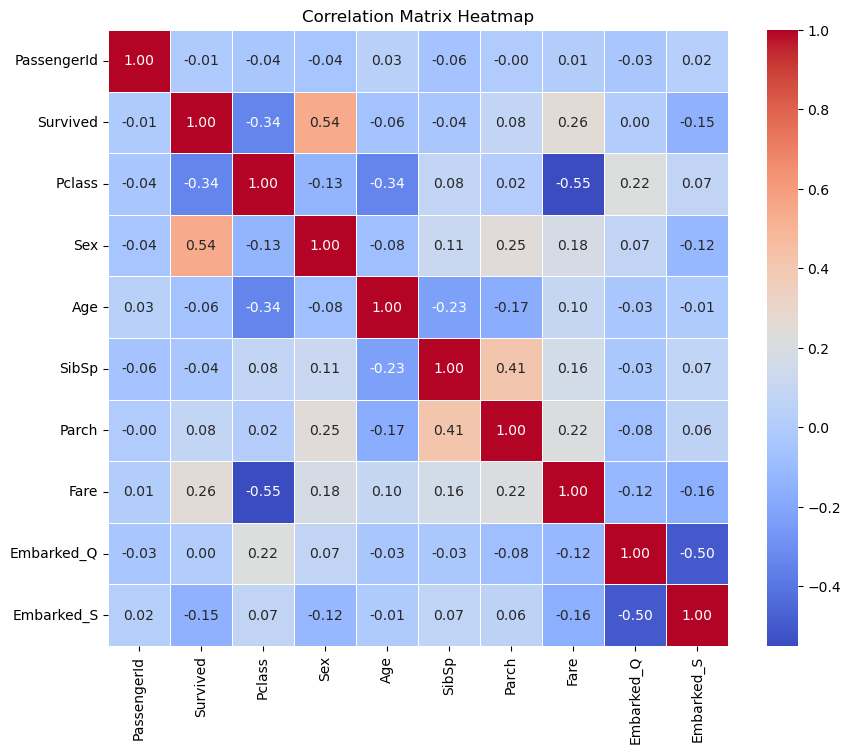

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#  1. Univariate Analysis

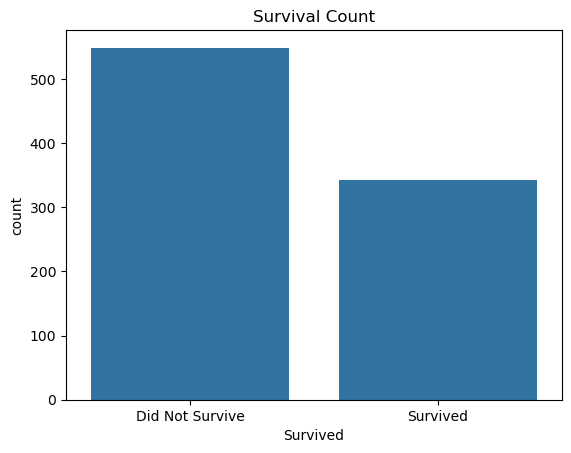

In [31]:
# Target: Distribution of Survived
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

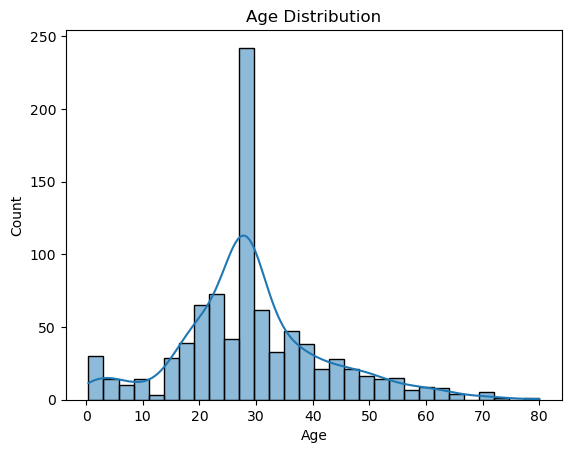

In [32]:
# Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

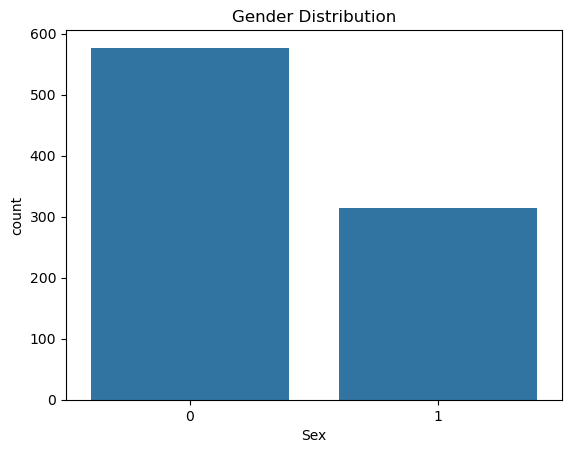

In [33]:
# Gender Count
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

# 2. Bivariate Analysis

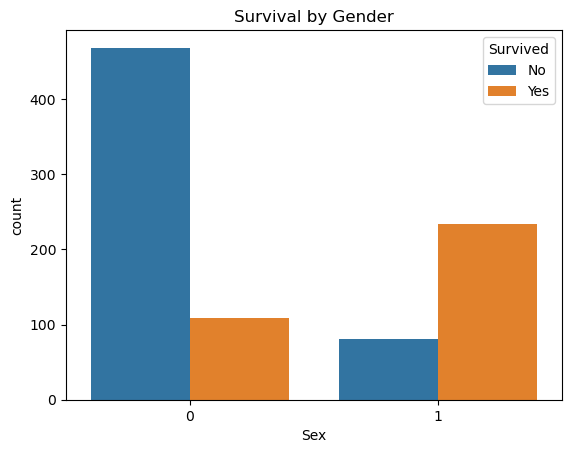

In [34]:
# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

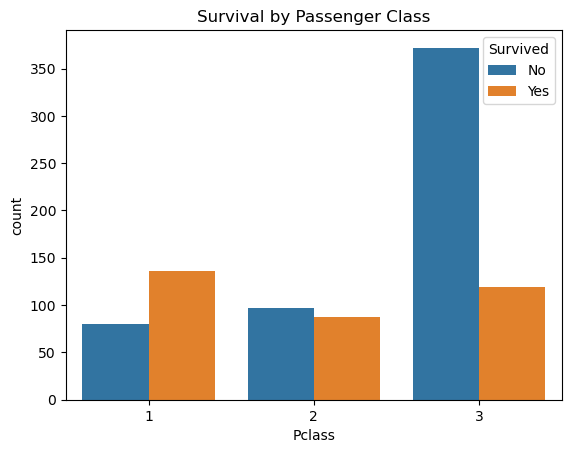

In [35]:
# Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

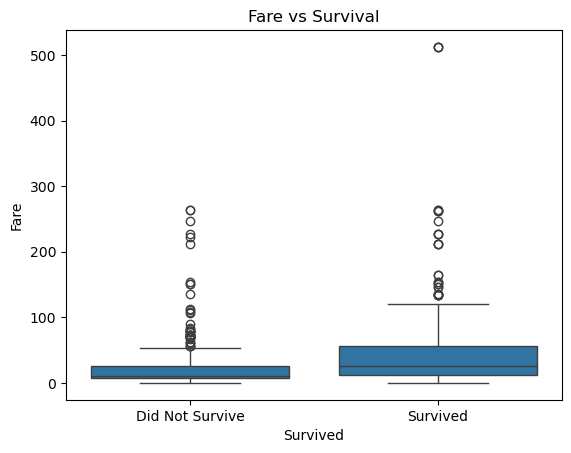

In [36]:
# Fare vs. Survival
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare vs Survival')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

# 3. Multivariate Analysis

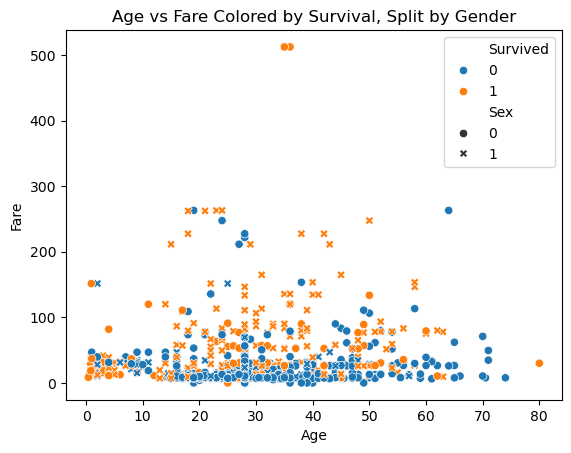

In [37]:
# Age vs Fare Colored by Survival and Split by Gender
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Sex')
plt.title('Age vs Fare Colored by Survival, Split by Gender')
plt.show()

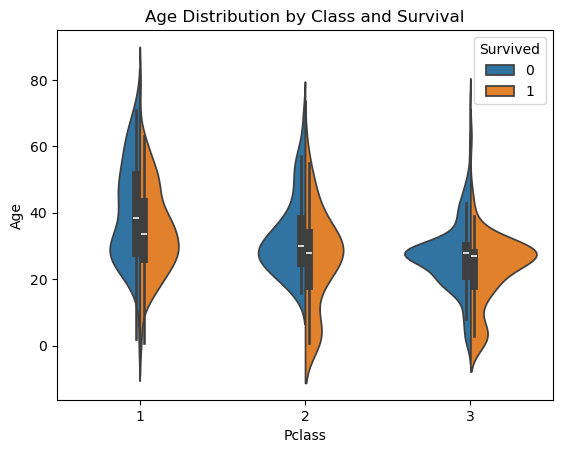

In [38]:
# Violin Plot: Age by Pclass and Survival
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()

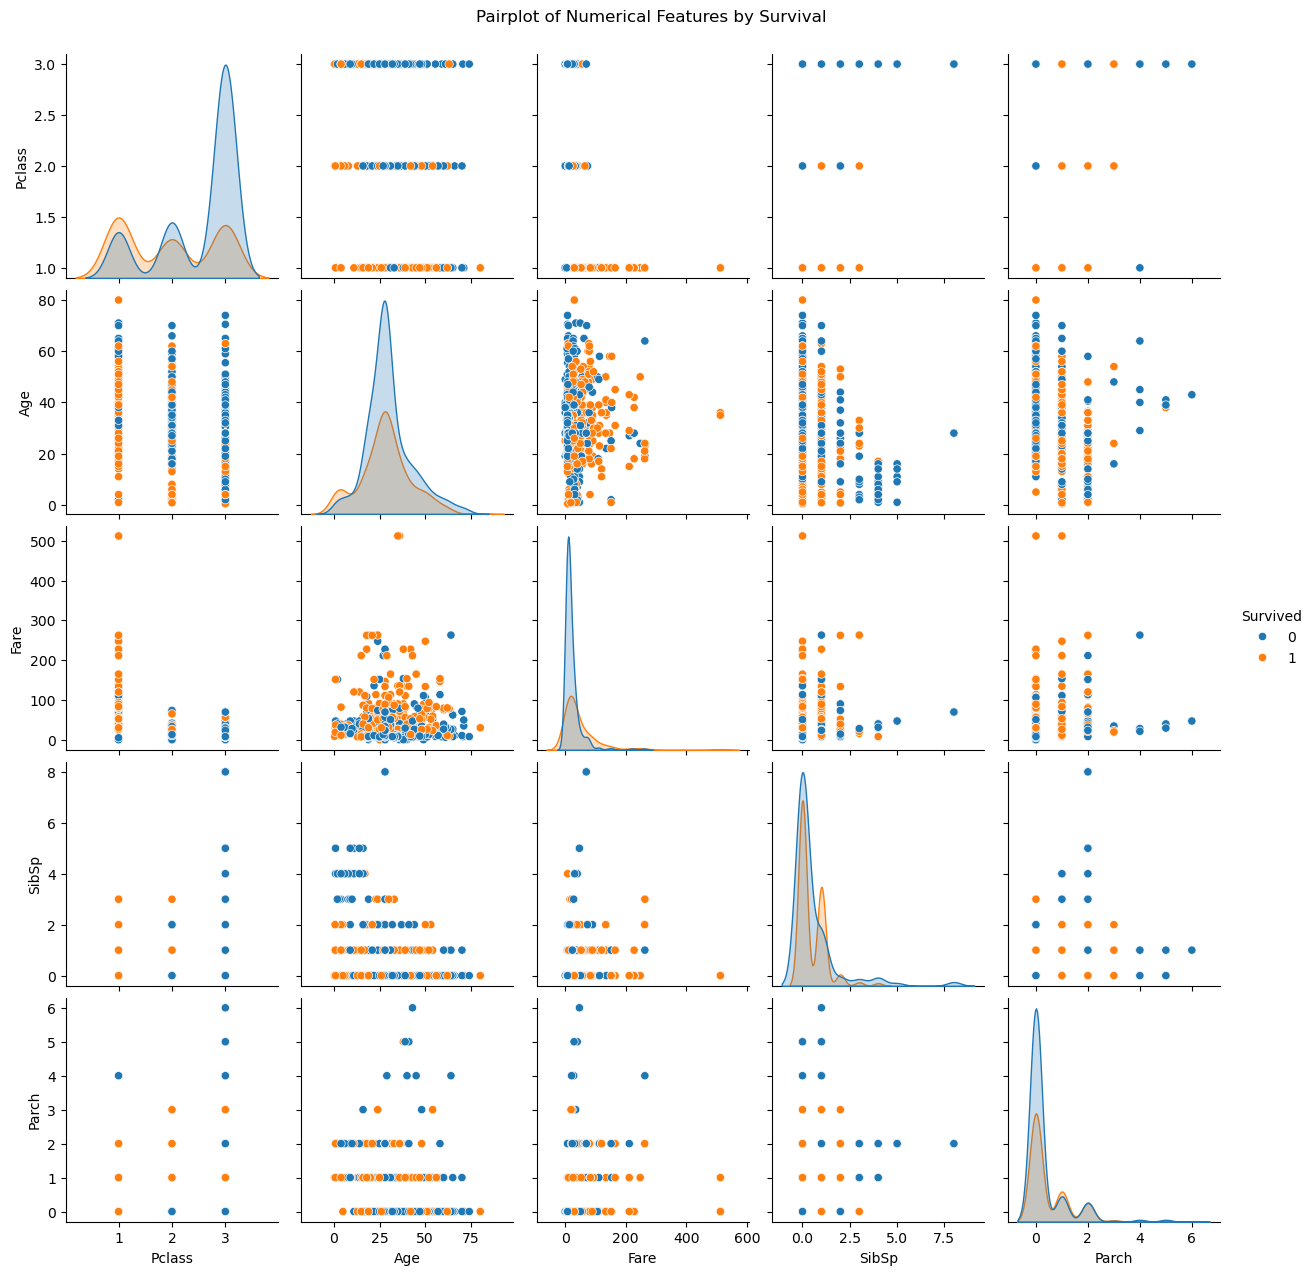

In [39]:
# Pair Plot of Numerical Features Colored by Survival
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()